# Dataset Link :
https://www.kaggle.com/datasets/winchester19/indian-music-genre-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
folderpath='/content/drive/MyDrive/Indian_music_dataset/genrenew/'

In [59]:
import os
import csv
os.chdir(folderpath)
data=[]
for folder_name in os.listdir(folderpath):
    folder_path = os.path.join(folderpath, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Get the label from the folder name
        label = folder_name


        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            # Create a row with file name and label
            data.append([file_name, label])
# Define the CSV file name
csv_file = 'music_labels.csv'

# Write data to a CSV file
with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(['File_Name', 'Label'])
    # Write the data
    csv_writer.writerows(data)

print(f'CSV file "{csv_file}" created successfully.')

CSV file "music_labels.csv" created successfully.


In [2]:
import pandas as pd
datapath=pd.read_csv('/content/drive/MyDrive/Indian_music_dataset/genrenew/music_labels.csv')
datapath.head()

,File_Name,Label
0,scl06.mp3,semiclassical
1,scl05.mp3,semiclassical
2,scl03.mp3,semiclassical
3,scl04.mp3,semiclassical
4,scl02.mp3,semiclassical


In [3]:
datapath

,File_Name,Label
0,scl06.mp3,semiclassical
1,scl05.mp3,semiclassical
2,scl03.mp3,semiclassical
3,scl04.mp3,semiclassical
4,scl02.mp3,semiclassical
...,...,...
495,ca38.mp3,carnatic
496,ca83.mp3,carnatic
497,ca73.mp3,carnatic
498,ca77.mp3,carnatic


In [4]:
datapath['Label'].unique()

array(['semiclassical', 'ghazal', 'sufi', 'bollypop', 'carnatic'],
      dtype=object)

In [5]:
datapath['Label'].value_counts()

semiclassical    100
ghazal           100
sufi             100
bollypop         100
carnatic         100
Name: Label, dtype: int64

In [81]:
'''! pip uninstall librosa
! pip install librosa
'''

Found existing installation: librosa 0.10.1
Uninstalling librosa-0.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/librosa-0.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/librosa/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/audio._zc_wrapper-1152.py310.1.nbc
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/audio._zc_wrapper-1152.py310.2.nbc
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/audio._zc_wrapper-1152.py310.nbi
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/guf-audio._zc_wrapper-1152.py310.1.nbc
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/guf-audio._zc_wrapper-1152.py310.2.nbc
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/guf-audio._zc_wrapper-1152.py310.nbi
    /usr/local/lib/python3.10/dist-packages/librosa/core/__pycache__/guf-pitch._pi_wrapper-439.py310.1.nbc
 

In [6]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

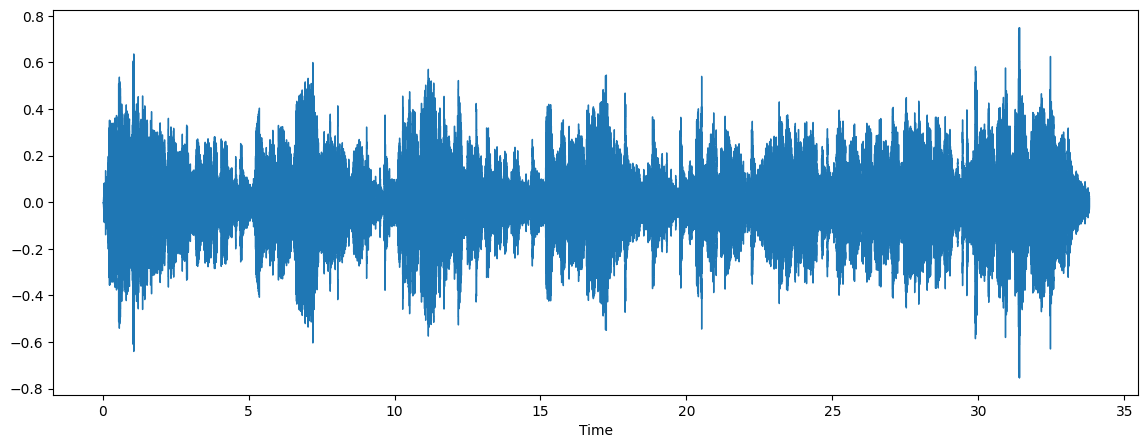

In [151]:
filename='/content/drive/MyDrive/Indian_music_dataset/HoshwalonKoKhabarKya.mp3'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)

ipd.Audio(filename)

In [152]:
print(sample_rate)

22050


In [153]:
print(data)

[-2.8073044e-09 -2.6987057e-10 -3.9124592e-10 ... -8.5562933e-04
 -7.3435099e-04 -3.6497273e-05]


In [154]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 1456)
[[-352.76303   -270.45737   -235.42232   ... -247.43484   -253.48068
  -288.7468   ]
 [ 104.95575    100.56975     84.45705   ...   86.32783     85.591484
    91.588455 ]
 [  -2.8393536   -5.455859   -11.819206  ...  -19.584167   -22.09718
   -20.77708  ]
 ...
 [  13.982647    16.201912    11.814459  ...   17.461754     3.1111922
     4.921151 ]
 [   2.0269341   -4.6528873   -9.738893  ...   11.119682    -2.3103318
    -0.6777408]
 [ -12.710022   -10.082615    -5.8355956 ...   17.751793     4.8683257
     3.4868834]]


In [73]:
pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.4 MB/s eta 0:00:00


In [11]:
import numpy as np
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [13]:
import numpy as np
from tqdm import tqdm
import resampy
import os
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(datapath.iterrows()):
    file_name = os.path.join(os.path.abspath(folderpath),str(row["Label"])+'/',str(row["File_Name"]))
    final_class_labels=row["Label"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

500it [12:42,  1.53s/it]


In [19]:
extracted_features_data=pd.DataFrame(extracted_features,columns=['extractfeature','label'])
extracted_features_data

,extractfeature,label
0,"[-86.396255, 115.195206, 4.5464344, 31.60447, ...",semiclassical
1,"[-100.35735, 103.695015, 7.9037466, 23.909279,...",semiclassical
2,"[-57.565224, 99.57622, -8.042201, 27.250153, -...",semiclassical
3,"[-104.42676, 117.92758, 17.769234, 20.585764, ...",semiclassical
4,"[-69.87703, 81.66209, -6.6416097, 32.762566, 0...",semiclassical
...,...,...
495,"[-179.50003, 89.97289, 3.6465762, 27.045357, -...",carnatic
496,"[-162.37346, 92.82498, -67.8502, 39.344162, -2...",carnatic
497,"[-155.49582, 117.31737, 7.641766, 21.546497, 8...",carnatic
498,"[-180.9688, 107.51098, -67.967896, 67.64438, -...",carnatic


In [15]:
extracted_features_data.shape

(500, 2)

In [16]:
# Split the dataset into independent and dependent dataset
x=np.array(extracted_features_data['extractfeature'].tolist())
y=np.array(extracted_features_data['label'].tolist())

In [17]:
print(x.shape)
print(y.shape)

(500, 40)
(500,)


In [18]:
print(x)
print(y)

[[ -86.396255    115.195206      4.5464344  ...   -4.393219
    -4.6731567    -0.25800836]
 [-100.35735     103.695015      7.9037466  ...   -6.019269
    -6.6917415     0.60892   ]
 [ -57.565224     99.57622      -8.042201   ...    0.3361341
    -1.6146266    -0.5313277 ]
 ...
 [-155.49582     117.31737       7.641766   ...   -2.2510517
     4.10414      -4.784519  ]
 [-180.9688      107.51098     -67.967896   ...   -3.914133
    -1.1002316    -1.0075086 ]
 [-181.11188     131.25919     -23.868292   ...   -3.5652711
    -1.0815492    -2.672247  ]]
['semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semiclassical'
 'semiclassical' 'semiclassical' 'semiclassical' 'semic

In [20]:
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 40)
(100, 40)
(400, 5)
(100, 5)


In [40]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=20)
model1.fit(x_train,y_train)
pred_y1=model1.predict(x_test)
#print(pred_y1)
# Calculate the Hamming loss
from sklearn.metrics import hamming_loss,f1_score
loss = hamming_loss(y_test, pred_y1)
print('hamming loss :',loss)

# Calculate the F1 score for each class
f1_scores = f1_score(y_test, pred_y1, average=None)
print('f1_scores :',f1_scores)
# Calculate the macro-average F1 score
macro_f1 = f1_score(y_test, pred_y1, average='macro')
print('macro_f1score :',macro_f1)

hamming loss : 0.164
f1_scores : [0.52173913 0.80851064 0.75675676 0.25       0.52631579]
macro_f1score : 0.5726644629926192


In [46]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,random_state=20)
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
#print(pred_y2)
# Calculate the Hamming loss
from sklearn.metrics import hamming_loss,f1_score
loss = hamming_loss(y_test, pred_y2)
print('hamming loss :',loss)

# Calculate the F1 score for each class
f1_scores = f1_score(y_test, pred_y2, average=None)
print('f1_scores :',f1_scores)
# Calculate the macro-average F1 score
macro_f1 = f1_score(y_test, pred_y2, average='macro')
print('macro_f1score :',macro_f1)

hamming loss : 0.1
f1_scores : [0.51612903 0.84210526 0.97560976 0.31578947 0.28571429]
macro_f1score : 0.5870695621824032


In [42]:
import xgboost as xgb
from xgboost import XGBClassifier
model3=XGBClassifier(n_estimators=100,random_state=20)
model3.fit(x_train,y_train)
pred_y3=model3.predict(x_test)
#print(pred_y3)
# Calculate the Hamming loss
from sklearn.metrics import hamming_loss,f1_score
loss = hamming_loss(y_test, pred_y3)
print('hamming loss :',loss)

# Calculate the F1 score for each class
f1_scores = f1_score(y_test, pred_y3, average=None)
print('f1_scores :',f1_scores)
# Calculate the macro-average F1 score
macro_f1 = f1_score(y_test, pred_y3, average='macro')
print('macro_f1score :',macro_f1)

hamming loss : 0.08
f1_scores : [0.78947368 0.85       0.95       0.52173913 0.55172414]
macro_f1score : 0.7325873905152687


In [149]:
filename1='/content/drive/MyDrive/Indian_music_dataset/Besbriya - Armaan Malik ! MS Dhoni ! Hindi.mp3'
audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=model1.predict(mfccs_scaled_features)
print(predicted_label)
# y is in (1,5) so convert 1d & boolean datatype
predicted_label_1d = np.ravel(predicted_label).astype(bool)
prediction_class = labelencoder.inverse_transform(predicted_label_1d)

print(prediction_class)

[[1. 0. 0. 0. 0.]]
['bollypop']


In [74]:
def testing(pathofmusic):
  audio, sample_rate = librosa.load(pathofmusic, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
  mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
  predicted_label=model3.predict(mfccs_scaled_features)
  # y is in (1,5) so convert 1d & boolean datatype
  predicted_label_1d = np.ravel(predicted_label).astype(bool)
  prediction_class = labelencoder.inverse_transform(predicted_label_1d)
  return prediction_label,prediction_class

In [93]:
m1='/content/drive/MyDrive/Indian_music_dataset/genrenew/semiclassical/scl05.mp3'
testing(m1)

[[0. 0. 0. 1. 0.]]
['semiclassical']


In [119]:
m3='/content/drive/MyDrive/Indian_music_dataset/arijitbatokoteri.mp3'
testing(m3)

[[0. 0. 0. 1. 0.]]
['semiclassical']


In [131]:
m5='/content/drive/MyDrive/Indian_music_dataset/Jab Tak - MS Dhoni.mp3'
testing(m7)

[[1. 0. 0. 0. 0.]]
['bollypop']


In [133]:
m7='/content/drive/MyDrive/Indian_music_dataset/Ms Dhoni.mp3'
testing(m9)

[[1. 0. 0. 0. 0.]]
['bollypop']
